# <center>Tugas Besar AI</center>

<b>Topik</b>
Klasifikasi pada Auction Verification menggunakan K-Nearest Neighbour

<b>Kelompok: </b>

Anggota:
1. AZIZAH SALMA AYUNISA P - 1301220021
2. AQILA HASYA NAFISAH - 1301220398
3. VIOLA NANTHIKA - 1301223354

#### Pendahuluan
Dataset yang dipilih adalah Auction verification. Data set ini berisikan data pelelangan dengan 9 variable, yaitu terdapat kapasitas barang penawar 1, kapasitas barang penawar 2, kapasitas barang penawar 3, kapasitas barang penawar 4, harga lelang, barang yang diverifikasi, penawar yang mendapatkan lelang, hasil verifikasi lelang, dan waktu verifikasi yang dilakukan. Verifikasi yang dilakukan dapat membantu menganalisis hasil verifikasi lelang dengan hasil yang efisien. Kami akan melakukan learning dengan klasifikasi, The k-nearest neighbors (KNN). Dimana kami akan memprediksi hasil verifikasi.

Kami memilih KNN karena data kami dapat diprediksi menggunakan klasifikasi dan dibandingkan dengan metode learning lainnya KNN lebih cocok digunakan untuk data kami yang berisi numerik untuk featurenya.

Kapasitas barang penawar 1, kapasitas barang penawar 2, kapasitas barang penawar 3, kapasitas barang penawar 4, harga lelang, barang yang diverifikasi, penawar yang mendapatkan lelang, adalah feature. Sedangkan hasil verifikasi lelang, dan waktu verifikasi adalah target. Disini kami akan menggunakan hasil verifikasi lelang sebagai target kami, karena bentuk verifikasi result adalah klasifikasi sedangkan verification time adalah regresi maka agar konsisten verification time tidak diambil sebagai data yang akan digunakan.

Data akan dibagi menjadi dua bagian yaitu target di variabel y dan feature di variabel X. Untuk data test akan diambil 20 persen dari data yang ada dan 80 persen lainnya untuk train. Untuk data validation akan diambil 20 persen dan 80 persen untuk data train, data diambil dari 80 persen data training yang dibagi sebelumnya.

Sumber data set : https://archive.ics.uci.edu/dataset/713/auction+verification

In [ ]:
pip install ucimlrepo

In [ ]:
# Import Library yang akan digunakan
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import math
import operator
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [ ]:
# Menambahkan data
from ucimlrepo import fetch_ucirepo

# fetch dataset
auction_verification = fetch_ucirepo(id=713)

# data (as pandas dataframes)
X = auction_verification.data.features
y = auction_verification.data.targets
data_auction=pd.concat([X, y], axis=1)

# metadata
print(auction_verification.metadata)

# variable information
print(auction_verification.variables)

{'uci_id': 713, 'name': 'Auction Verification', 'repository_url': 'https://archive.ics.uci.edu/dataset/713/auction+verification', 'data_url': 'https://archive.ics.uci.edu/static/public/713/data.csv', 'abstract': 'We modeled a simultaneous multi-round auction with BPMN models, transformed the latter to Petri nets, and used a model checker to verify whether certain outcomes of the auction are possible or not.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 2043, 'num_features': 7, 'feature_types': [], 'demographics': [], 'target_col': ['verification.result', 'verification.time'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Sun Apr 24 2022', 'dataset_doi': '10.24432/C52K6N', 'creators': ['Elaheh Ordoni', 'Jakob Bach', 'Ann-Katrin Fleck', 'Jakob Bach'], 'intro_paper': {'title': 'Analyzing and Predicting Verification of Data-Aware Pro

In [ ]:
# Menampilkan info data
auction_verification.data

{'ids': None,
 'features':       process.b1.capacity  process.b2.capacity  process.b3.capacity  \
 0                       0                    0                    2   
 1                       0                    0                    2   
 2                       0                    0                    2   
 3                       0                    0                    2   
 4                       0                    0                    2   
 ...                   ...                  ...                  ...   
 2038                    2                    3                    2   
 2039                    2                    3                    2   
 2040                    2                    3                    2   
 2041                    2                    3                    2   
 2042                    2                    3                    2   
 
       process.b4.capacity  property.price  property.product  property.winner  
 0                       1  

Dapat terlihat bahwa tidak ada missing value di data ini.

In [ ]:
# Mengecek data yang null
X_null=X.isnull().sum()
y_null=y.isnull().sum()
print(X_null)
print(y_null)

process.b1.capacity    0
process.b2.capacity    0
process.b3.capacity    0
process.b4.capacity    0
property.price         0
property.product       0
property.winner        0
dtype: int64
verification.result    0
verification.time      0
dtype: int64


In [ ]:
# Menampilkan feature data
X

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner
0,0,0,2,1,59,1,0
1,0,0,2,1,59,2,0
2,0,0,2,1,59,4,0
3,0,0,2,1,59,6,0
4,0,0,2,1,60,1,0
...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0
2039,2,3,2,1,90,5,1
2040,2,3,2,1,90,5,2
2041,2,3,2,1,90,5,3


Dapat dilihat dari heatmap bahwa semua variabel berkolerasi dengan verification result

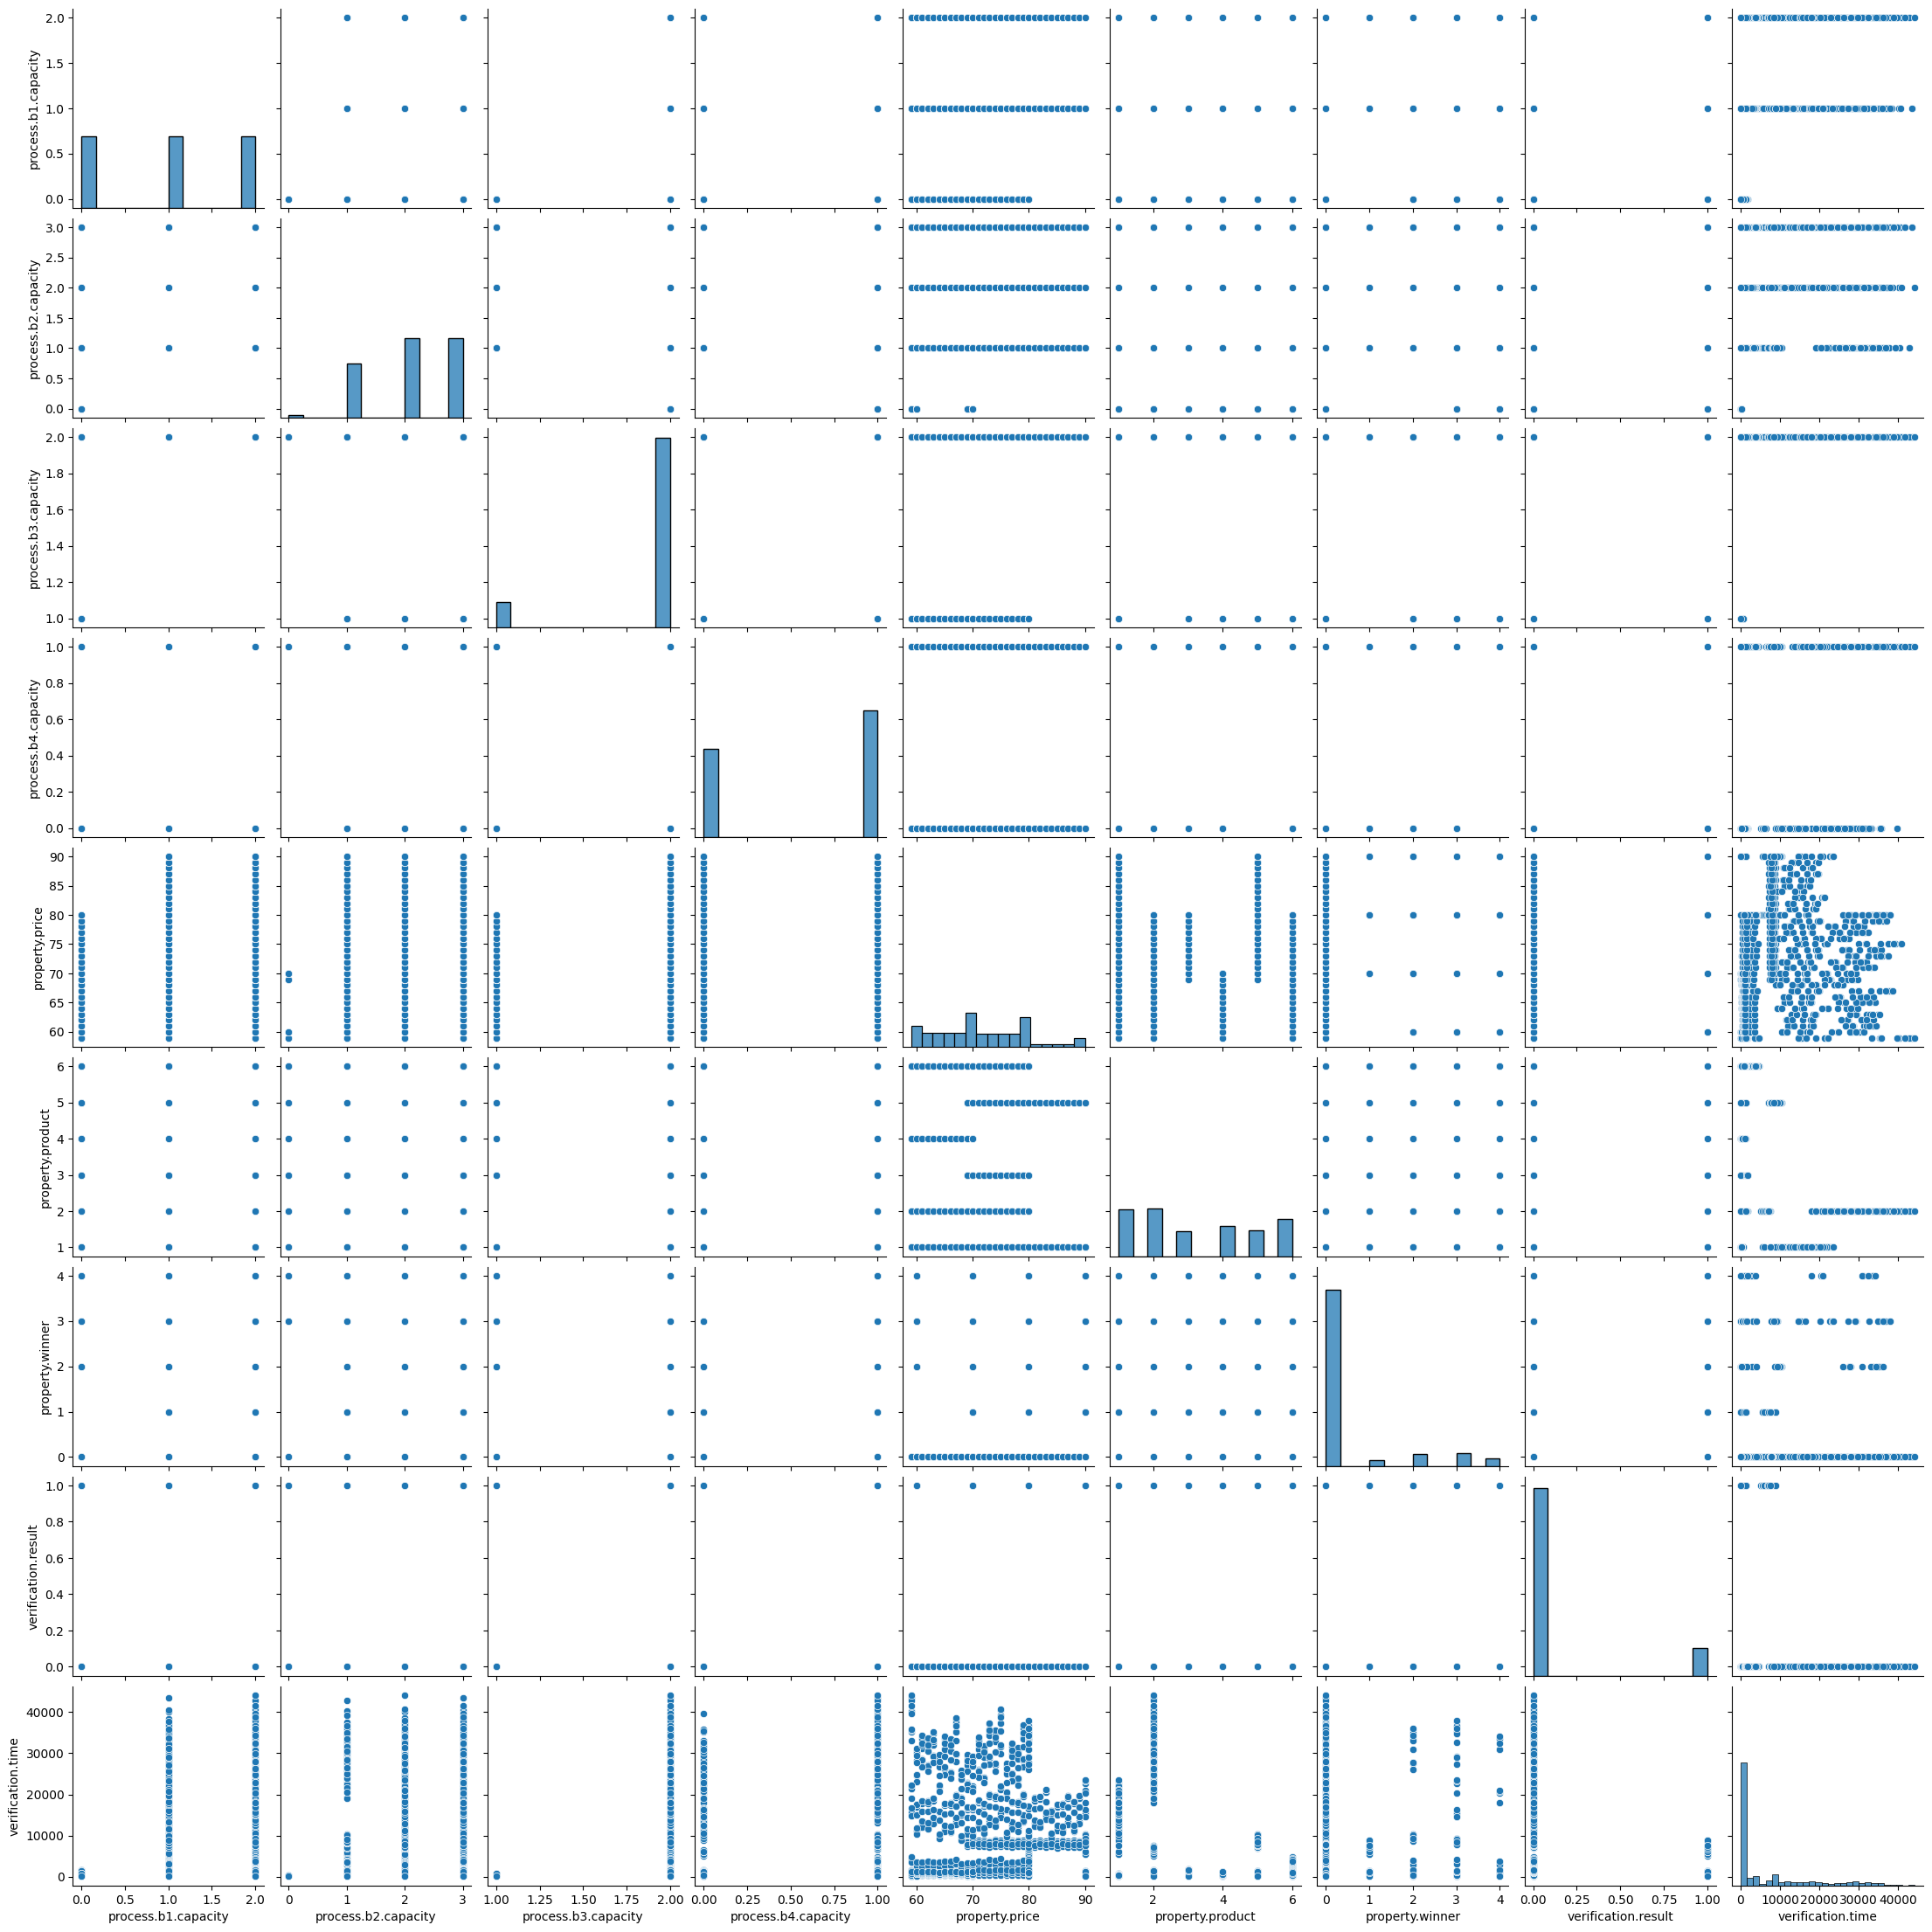

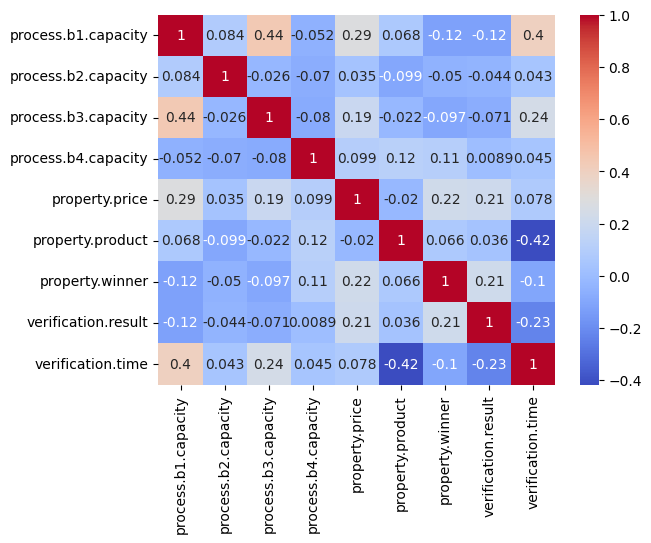

In [ ]:
# Menampilkan Visualisasi data di Feature
sns.pairplot(data_auction)
plt.show()

matrix_korelasi= data_auction.corr()
sns.heatmap(matrix_korelasi, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Drop verification time sebagai target
y=y.drop(columns=["verification.time"])

In [ ]:
# Menampilkan target yang akan digunakan
y

,verification.result
0,False
1,False
2,False
3,False
4,True
...,...
2038,True
2039,True
2040,False
2041,False


Untuk tipe data di auction verification semuanya memiliki tipe data int64 kecuali verification result, untuk memudahkan learning akan dilakukan konversi tipe data bool menjadi int64

In [ ]:
print(X.dtypes)
print()
print(y.dtypes)

process.b1.capacity    int64
process.b2.capacity    int64
process.b3.capacity    int64
process.b4.capacity    int64
property.price         int64
property.product       int64
property.winner        int64
dtype: object

verification.result    bool
dtype: object


**NORMALISASI**

---
Pada hasil normalisasi disini, kami menggunakan Metode Z-Score karena metode ini bersifat universal dan menggunakan mean dan standar deviasi dalam perhitungannya.

Pertama kami mengubah feature property.winner menjadi one_hot_encoded_data agar data lebih bersih, lalu mengubah value verification.result dan property.winner menjadi int, agar dapat mudah diolah dalam training data.

Ketika di cek menggunakan boxplot, ditemukan outlier pada feature process.b3.capacity, maka kami menghapusnya menggunakan IQR

Setelah semua selesai dilakukan penghitungan Z-Score kecuali untuk process.b3.capacity karena ketika di zscore akan menjadi NaN. Hal ini dikarenakan setelah outlier di hapus data process.b3.capacity menjadi konstan, dapat dilihat dari histogramnya.


In [ ]:
# 1. Normalisasi data yang categorical yaitu property.winner
one_hot_encoded_data = pd.get_dummies(X, columns = ["property.winner"])
X_normal=one_hot_encoded_data

In [ ]:
# 2. Mengubah semua bentuk data menjadi int64
y["verification.result"]=y["verification.result"].astype(int)
X_normal["property.winner_0"]=X_normal["property.winner_0"].astype(int)
X_normal["property.winner_1"]=X_normal["property.winner_1"].astype(int)
X_normal["property.winner_2"]=X_normal["property.winner_2"].astype(int)
X_normal["property.winner_3"]=X_normal["property.winner_3"].astype(int)
X_normal["property.winner_4"]=X_normal["property.winner_4"].astype(int)

In [ ]:
y

,verification.result
0,0
1,0
2,0
3,0
4,1
...,...
2038,1
2039,1
2040,0
2041,0


In [ ]:
X_normal

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner_0,property.winner_1,property.winner_2,property.winner_3,property.winner_4
0,0,0,2,1,59,1,1,0,0,0,0
1,0,0,2,1,59,2,1,0,0,0,0
2,0,0,2,1,59,4,1,0,0,0,0
3,0,0,2,1,59,6,1,0,0,0,0
4,0,0,2,1,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,1,0,0,0,0
2039,2,3,2,1,90,5,0,1,0,0,0
2040,2,3,2,1,90,5,0,0,1,0,0
2041,2,3,2,1,90,5,0,0,0,1,0


Dari boxplot berikut, process.b3.capacity memiliki satu outlier, sehingga harus dihilangkan terlebih dahulu.

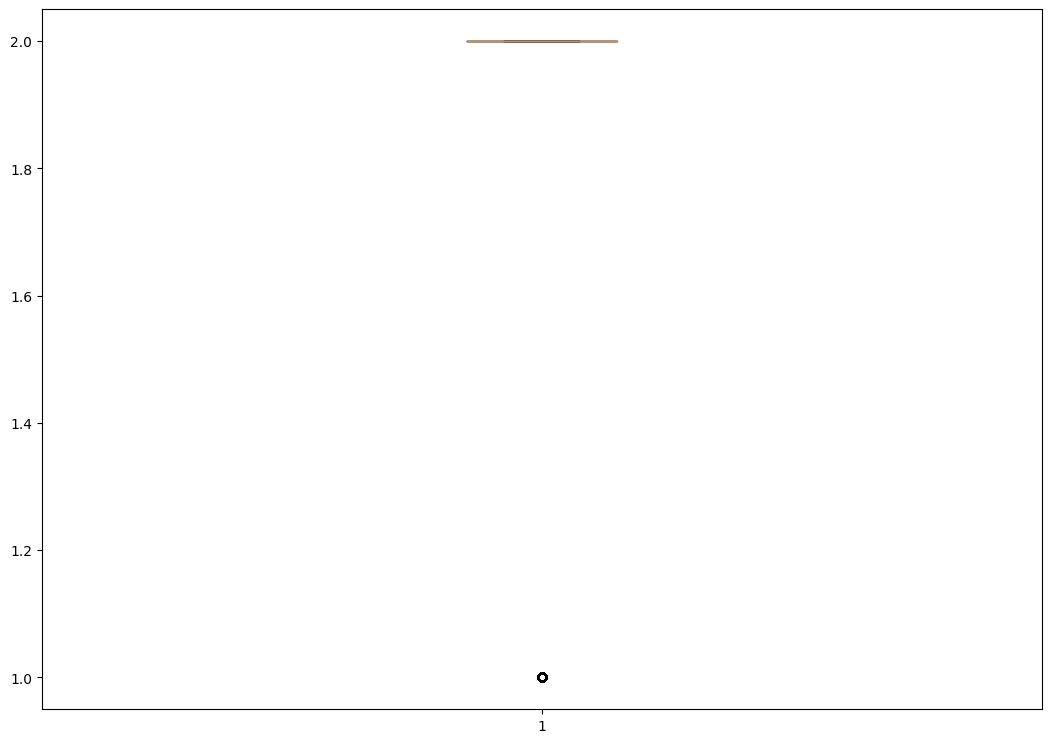

In [ ]:
# Menampilkan boxplot untuk mencari outlier
fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X['process.b3.capacity'])
plt.show()

In [ ]:
# 3. Menghilangkan outlier dari process.b3.capacity
def removal_outlier(df, y, column, threshold):
    return df.drop(df[df[column] < threshold].index), y.drop(df[df[column] < threshold].index)

Q1=X_normal['process.b3.capacity'].quantile(0.25)
Q3=X_normal['process.b3.capacity'].quantile(0.75)
IQR=Q3-Q1

l_bound=Q1-1.5*IQR
u_bound=Q3+1.5*IQR
print(u_bound, l_bound)

#karena keduanya sama maka :
threshold_value = 2
X_normal, y_normal = removal_outlier(X_normal, y, 'process.b3.capacity', threshold_value)

2.0 2.0


In [ ]:
# 4. Normalisasi dengan Z-Score
def zscore(data):
  data_dum = data.copy()
  data_dum["process.b1.capacity"] = (data_dum["process.b1.capacity"] - data_dum["process.b1.capacity"].mean()) / data_dum["process.b1.capacity"].std()
  data_dum["process.b2.capacity"] = (data_dum["process.b2.capacity"] - data_dum["process.b2.capacity"].mean()) / data_dum["process.b2.capacity"].std()
  # process.b3.capacity tidak di zscore karena semua data sama akibat penghapusan outlier
  data_dum["process.b4.capacity"] = (data_dum["process.b4.capacity"] - data_dum["process.b4.capacity"].mean()) / data_dum["process.b4.capacity"].std()
  data_dum["property.price"] = (data_dum["property.price"] - data_dum["property.price"].mean()) / data_dum["property.price"].std()
  data_dum["property.product"] = (data_dum["property.product"] - data_dum["property.product"].mean()) / data_dum["property.product"].std()
  return data_dum

X_normal = zscore(X_normal)



---

**GRAFIK UNTUK NORMALISASI**


---



Setelah dilakukan normalisasi dihasilkan boxplot dan histogram sebagai berikut. Untuk boxplot dimana data bersifat numerik sudah tidak memiliki outlier. Pada histogram variabel process.b2.capacity, process.b4.capacity, dan property.product tidak normal distribusinya tapi berusaha untuk menjadi normal, sementara untuk variabel lain sudah normal semua untuk distribusinya karena membentuk bell.

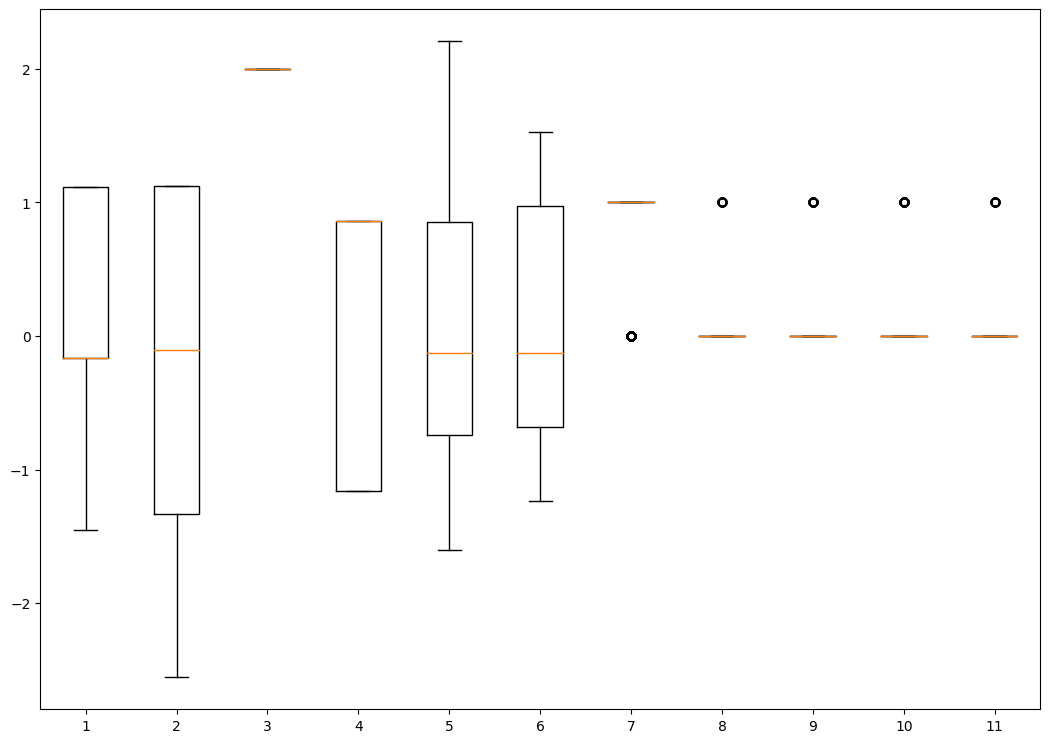

In [ ]:
# Menampilkan boxplot untuk mencari outlier
fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X_normal)
plt.show()

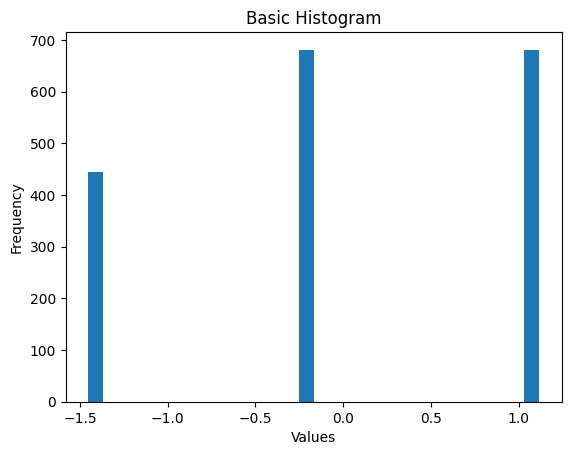

In [ ]:
# Menampilkan histogram untuk melihat distribusi
plt.hist(X_normal['process.b1.capacity'], bins=30)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

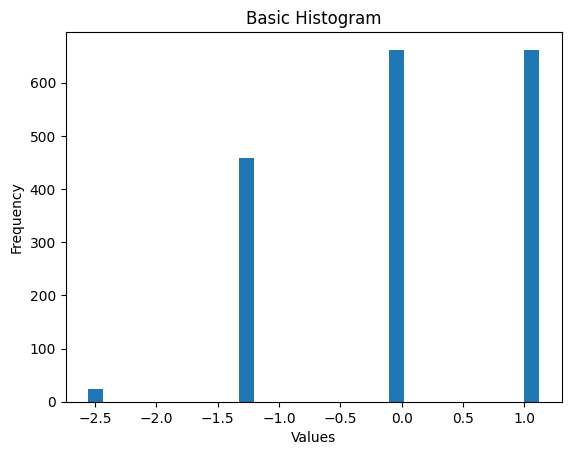

In [ ]:
# Menampilkan histogram untuk melihat distribusi
plt.hist(X_normal['process.b2.capacity'], bins=30)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

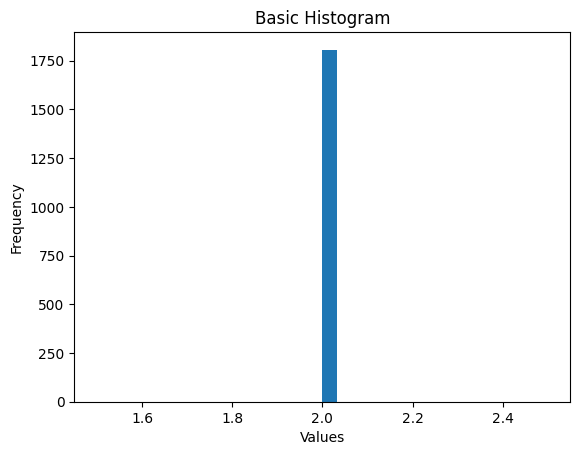

In [ ]:
# Menampilkan histogram untuk melihat distribusi
plt.hist(X_normal['process.b3.capacity'], bins=30)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

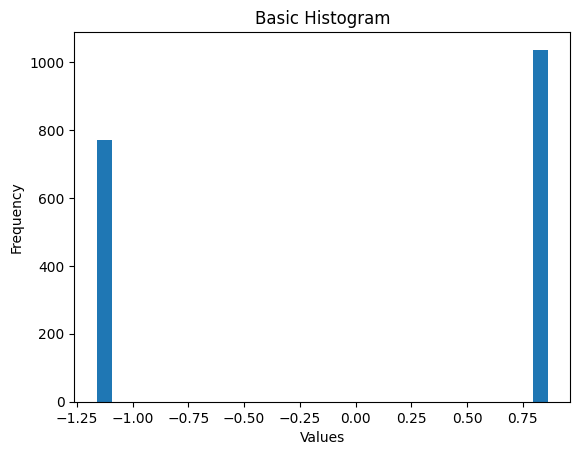

In [ ]:
# Menampilkan histogram untuk melihat distribusi
plt.hist(X_normal['process.b4.capacity'], bins=30)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

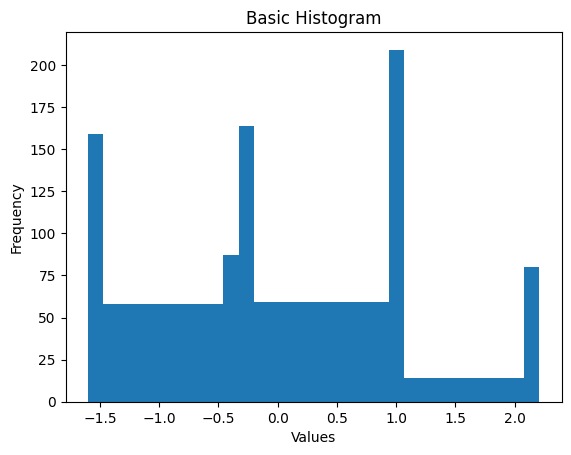

In [ ]:
# Menampilkan histogram untuk melihat distribusi
plt.hist(X_normal['property.price'], bins=30)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

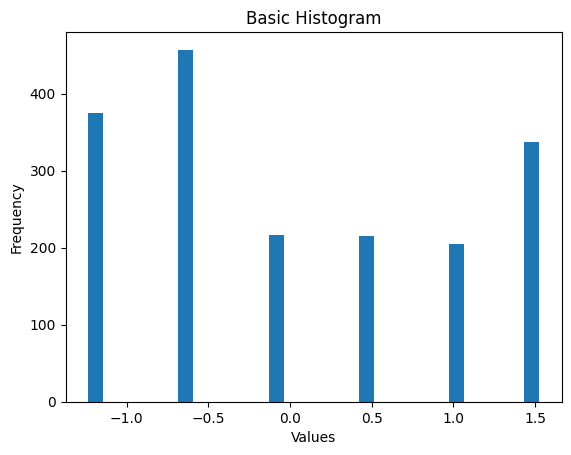

In [ ]:
# Menampilkan histogram untuk melihat distribusi
plt.hist(X_normal['property.product'], bins=30)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

Membagi data menjadi 80 persen data train dan 20 persen data test

In [ ]:
# Split data Training 80 persen, Test 20 persen
Xtrain_all, Xtest_all, ytrain_all, ytest_all = train_test_split(X_normal, y_normal, test_size = 0.2, random_state=40)

#### Metode yang Digunakan

Metode yang digunakan The k-nearest neighbors (KKN). Metode ini merupakan algoritma dalam machine learning yang digunakan untuk klaasifikasi dan regresi, metode ini juga terkenal sederhana namun efektif. Algoritma ini mengklasifikasikan sebuah titik data baru berdasarkan mayoritas kelas dari titik-titik data yang terdekatnya.

Untuk parameter yang akan kami gunakan adalah sebagai berikut:

1. def jarak(test, val, x, barisVal, barisTrain)
Untuk fungsi jarak diperlukan data validasi dan train untuk menghitung jarak variabel di data tersebut, untuk x adalah banyak kolom di data tersebut yang harus dihitung, untuk barisVal dan barisTrain adalah index baris dari data validasi dan train.


2. def NearN(train, val, k, barisVal)
Untuk fungsi NearN adalah fungsi untuk mencari tetangga terdekat data validation berdasarkan k dari data train. Diperlukan baris validasi untuk mengakses fungsi jarak.


3. def klasifikasi(tetangga, ytrain)
Untuk fungsi klasifikasi diperlukan tetangga yang sudah didapat dari fungsi NearN dan ytrain yang merupakan kumpulan data klasifikasi


4. def a(TP, TN, FP, FN)
Untuk fungsi akurasi diperlukan TP, TN, FP, dan FN untuk menghitung akurasi


5. def p(TP, FP)
Untuk fungsi presisi diperlukan TP dan FP untuk menghitung presisi


6. def r(TP, FN)
Untuk fungsi recall diperlukan TP dan FN untuk menghitung recall


7. def f(TP, TN, FP, FN)
Untuk fungsi f1-score diperlukan TP dan FN untuk menghitung f1-score


8. def KNN_train(k, Xtrain, Xvalidasi, ytrain, yvalidasi)
Untuk fungsi KNN_train diperlukan k untuk menentukan berapa k tetangga yang diambil dan data Xtrain, Xvalidasi, ytrain, validasi, diperlukan untuk memprediksi data.


9. def KFOLD(k, hasil_performance)
Fungsi KFOLD berfungsi untuk testing dengan K-Fold, membagi nya menjadi beberapa fold, k diperlukan untuk parameter KNN_train, serta hasil_perfomance untuk menyimpan performance training.


10. def BestK(k, hasil_performance):
Fungsi KFOLD berfungsi untuk mencari k yang paling baik dari k fold maka diperlukan k, dimana k adalah batas kfold, serta hasil_perfomance untuk menyimpan performance training.

11. def ConfusionMatrix(TP, TN, FP, FN)
Fungsi ini memunculkan tabel confusion matrix, dibutuhkan TP, TN, FP, dan FN untuk mengisi value tabel tersebut

In [ ]:
# Menghitung jarak
def jarak(test, val, x, barisVal, barisTrain):
    jarak=0
    for i in range(x):
       jarak = jarak + pow((test.iloc[barisVal, i].astype(float)-val.iloc[barisTrain, i].astype(float)), 2)
    return math.sqrt(jarak)

In [ ]:
# Menghitung k-tetangga terdekat
def NearN(train, val, k, barisVal):
    himpJarak=[]
    for i in range(len(train)):
      distance=jarak(val, train, 11, barisVal, i) # digunakan 11 karena terdapat 11 kolom
      himpJarak.append((i, distance))
    himpJarak.sort(key=operator.itemgetter(1))

    return himpJarak[:k]

In [ ]:
# Menetapkan klasifikasinya
def klasifikasi(tetangga, ytrain):
  hasil=[]
  for i in range(len(tetangga)):
    idx=tetangga[i][0]
    hasil.append(ytrain.iloc[idx, 0])
  if hasil:
    return max(hasil, key=hasil.count)
  else:
    return None

In [ ]:
# Menghitung confusion Matrix
def a(TP, TN, FP, FN): # Menghitung akurasi
  if not(float(TP+TN+FP+FN)==0):
    return float(TP+TN)/float(TP+TN+FP+FN)
  return 0.0

def p(TP, FP): # Menghitung presisi
  if not(float(TP+FP)==0):
    return float(TP)/float(TP+FP)
  return 0.0

def r(TP, FN): # Menghitung recall
  if not(float(TP+FN)==0):
    return float(TP)/float(TP+FN)
  return 0.0

def f(TP, TN, FP, FN): # Menghitung f1-score
  if not(p(TP,FP)+r(TP, FN)==0):
    return (2.0*p(TP,FP)*r(TP, FN))/(p(TP, FP)+r(TP, FN))
  return 0.0

In [ ]:
# Menampilkan tabel Confusion Mat
def ConfusionMatrix(TP, TN, FP, FN):
  data = [["Predicted(+)", TP, FP], ["Predicted(-)", FN, TN]]
  head = ["", "Actual(+)", "Actual(-)"]
  print(tabulate(data, headers=head, tablefmt="grid"))


In [ ]:
# Algoritma utama kNN
def KNN_train(k, Xtrain, Xvalidasi, ytrain, yvalidasi):
    accuracy = 0
    precision = 0
    sensitivity = 0
    F1Score = 0
    TN=0
    TP=0
    FN=0
    FP=0
    # Klasifikasi
    for i in range(len(Xvalidasi)):
      tetangga=NearN(Xtrain, Xvalidasi, k, i)
      hasil=klasifikasi(tetangga, ytrain)
      if hasil==yvalidasi.iloc[i, 0]:
        if hasil==0:
          TN=TN+1
        elif hasil==1:
          TP=TP+1
      else:
        if hasil==1:
          FP=FP+1
        elif hasil==0:
          FN=FN+1
    # confusion matrix
    accuracy = a(TP, TN, FP, FN)
    precision = p(TP, FP)
    sensitivity = r(TP, FN)
    F1Score = f(TP, TN, FP, FN)
    print("Untuk k-", k)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall/Sensitivity: ", sensitivity)
    print("F1-Score: ", F1Score)
    ConfusionMatrix(TP, TN, FP, FN)
    print()

    return accuracy

In [ ]:
# Cross Validation k
def KFOLD(k, hasil_performance):
  nilaiFold=[]
  i=1
  kFold=KFold(n_splits=5,random_state=42,shuffle=True) #split data validasi 20 persen
  for idxTrain, idxValidasi in kFold.split(Xtrain_all):
    Xtrain, Xvalidasi, ytrain, yvalidasi = Xtrain_all.iloc[idxTrain], Xtrain_all.iloc[idxValidasi], ytrain_all.iloc[idxTrain], ytrain_all.iloc[idxValidasi]
    akurasi =KNN_train(k, Xtrain, Xvalidasi, ytrain, yvalidasi)
    i=i+1
    nilaiFold.append((akurasi))
  print("Rata rata performance/akurasinya adalah ", np.mean(nilaiFold, axis=0))
  hasil_performance.append((k, np.mean(nilaiFold, axis=0)))
  print()
  return np.mean(nilaiFold, axis=0)

In [ ]:
# Mencari k yang tepat untuk prediksi data
def BestK(k, hasil_performance):
  hasil_mean=[]
  for i in range(1, k+1):
    mean_fold=KFOLD(i, hasil_performance)
    hasil_mean.append((i, mean_fold))
    hasil_mean.sort(key=operator.itemgetter(1))

  print("k-yang dipilih dengan akurasi paling besar adalah k-", hasil_mean[-1][0]) #diambil yang paling besar akurasinya
  print()

In [ ]:
# Menjalankan Test
hasil_performance=[]
BestK(15, hasil_performance)
hasil_performance

Untuk k- 1
Accuracy:  0.9134948096885813
Precision:  0.6666666666666666
Recall/Sensitivity:  0.6111111111111112
F1-Score:  0.6376811594202899
+--------------+-------------+-------------+
|              |   Actual(+) |   Actual(-) |
+==============+=============+=============+
| Predicted(+) |          22 |          11 |
+--------------+-------------+-------------+
| Predicted(-) |          14 |         242 |
+--------------+-------------+-------------+

Untuk k- 1
Accuracy:  0.8858131487889274
Precision:  0.6071428571428571
Recall/Sensitivity:  0.4358974358974359
F1-Score:  0.5074626865671643
+--------------+-------------+-------------+
|              |   Actual(+) |   Actual(-) |
+==============+=============+=============+
| Predicted(+) |          17 |          11 |
+--------------+-------------+-------------+
| Predicted(-) |          22 |         239 |
+--------------+-------------+-------------+

Untuk k- 1
Accuracy:  0.9238754325259516
Precision:  0.6086956521739131
Recall/Sensi

[(1, 0.9092680699730874),
 (2, 0.9092680699730874),
 (3, 0.9141099577085736),
 (4, 0.9217296232218377),
 (5, 0.9092560553633218),
 (6, 0.9161860822760477),
 (7, 0.9002571126489812),
 (8, 0.9044093617839293),
 (9, 0.8912485582468281),
 (10, 0.8912485582468281),
 (11, 0.8829392541330258),
 (12, 0.8850153787004997),
 (13, 0.8808631295655518),
 (14, 0.8836361014994234),
 (15, 0.8815551710880429)]

In [ ]:
# Algoritma utama kNN
def KNN(k, Xtrain, Xtest, ytrain, ytest):
    accuracy = 0
    precision = 0
    sensitivity = 0
    F1Score = 0
    TN=0
    TP=0
    FN=0
    FP=0
    # Klasifikasi
    for i in range(len(Xtest)):
      tetangga=NearN(Xtrain, Xtest, k, i)
      hasil=klasifikasi(tetangga, ytrain)
      if hasil==ytest.iloc[i, 0]:
        if hasil==0:
          TN=TN+1
        elif hasil==1:
          TP=TP+1
      else:
        if hasil==1:
          FP=FP+1
        elif hasil==0:
          FN=FN+1
    # confusion matrix
    accuracy = a(TP, TN, FP, FN)
    precision = p(TP, FP)
    sensitivity = r(TP, FN)
    F1Score = f(TP, TN, FP, FN)
    print("Untuk k-", k)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall/Sensitivity: ", sensitivity)
    print("F1-Score: ", F1Score)
    ConfusionMatrix(TP, TN, FP, FN)
    print()

    return accuracy

In [ ]:
# Mencari k yang tepat untuk prediksi data
def BestK_TEST(k, hasil_performance):
  for i in range(1, k+1):
    accuracy_actual=KNN(i, Xtrain_all, Xtest_all,  ytrain_all, ytest_all)
    hasil_performance.append((i, accuracy_actual))
    hasil_performance.sort(key=operator.itemgetter(1))

  print("k-yang dipilih dengan akurasi paling besar adalah k-", hasil_performance[-1][0]) #diambil yang paling besar akurasinya
  print()

In [ ]:
hasil_performance_actual=[]

In [ ]:
# Menghitung hasil performance pada data Test
BestK_TEST(15, hasil_performance_actual) # Berhenti di k 11 karena RAM tidak cukup
hasil_performance_actual

Untuk k- 1
Accuracy:  0.93646408839779
Precision:  0.7142857142857143
Recall/Sensitivity:  0.5714285714285714
F1-Score:  0.634920634920635
+--------------+-------------+-------------+
|              |   Actual(+) |   Actual(-) |
+==============+=============+=============+
| Predicted(+) |          20 |           8 |
+--------------+-------------+-------------+
| Predicted(-) |          15 |         319 |
+--------------+-------------+-------------+

Untuk k- 2
Accuracy:  0.93646408839779
Precision:  0.7142857142857143
Recall/Sensitivity:  0.5714285714285714
F1-Score:  0.634920634920635
+--------------+-------------+-------------+
|              |   Actual(+) |   Actual(-) |
+==============+=============+=============+
| Predicted(+) |          20 |           8 |
+--------------+-------------+-------------+
| Predicted(-) |          15 |         319 |
+--------------+-------------+-------------+

Untuk k- 3
Accuracy:  0.9281767955801105
Precision:  0.6666666666666666
Recall/Sensitivity

In [ ]:
hasil_performance_actual.append((12, KNN(12, Xtrain_all, Xtest_all,  ytrain_all, ytest_all)))
hasil_performance_actual.append((13, KNN(13, Xtrain_all, Xtest_all,  ytrain_all, ytest_all)))
hasil_performance_actual.append((14, KNN(14, Xtrain_all, Xtest_all,  ytrain_all, ytest_all)))
hasil_performance_actual.append((15, KNN(15, Xtrain_all, Xtest_all,  ytrain_all, ytest_all)))

Untuk k- 12
Accuracy:  0.919889502762431
Precision:  1.0
Recall/Sensitivity:  0.17142857142857143
F1-Score:  0.2926829268292683
+--------------+-------------+-------------+
|              |   Actual(+) |   Actual(-) |
+==============+=============+=============+
| Predicted(+) |           6 |           0 |
+--------------+-------------+-------------+
| Predicted(-) |          29 |         327 |
+--------------+-------------+-------------+

Untuk k- 13
Accuracy:  0.9171270718232044
Precision:  1.0
Recall/Sensitivity:  0.14285714285714285
F1-Score:  0.25
+--------------+-------------+-------------+
|              |   Actual(+) |   Actual(-) |
+==============+=============+=============+
| Predicted(+) |           5 |           0 |
+--------------+-------------+-------------+
| Predicted(-) |          30 |         327 |
+--------------+-------------+-------------+

Untuk k- 14
Accuracy:  0.9171270718232044
Precision:  1.0
Recall/Sensitivity:  0.14285714285714285
F1-Score:  0.25
+---------

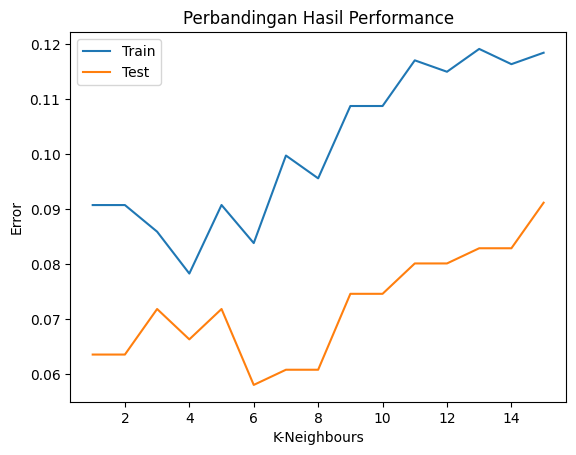

In [ ]:
# Menampilkan grafik hasil performance train dan test
hasil_performance=[(1, 0.9092680699730874),
 (2, 0.9092680699730874),
 (3, 0.9141099577085736),
 (4, 0.9217296232218377),
 (5, 0.9092560553633218),
 (6, 0.9161860822760477),
 (7, 0.9002571126489812),
 (8, 0.9044093617839293),
 (9, 0.8912485582468281),
 (10, 0.8912485582468281),
 (11, 0.8829392541330258),
 (12, 0.8850153787004997),
 (13, 0.8808631295655518),
 (14, 0.8836361014994234),
 (15, 0.8815551710880429)]

hasil_performance_actual=[(1, 0.93646408839779),
 (2, 0.93646408839779),
 (3, 0.9281767955801105),
 (4, 0.9337016574585635),
 (5, 0.9281767955801105),
 (6, 0.9419889502762431),
 (7, 0.9392265193370166),
 (8, 0.9392265193370166),
 (9, 0.925414364640884),
 (10, 0.925414364640884),
 (11, 0.919889502762431),
  (12, 0.919889502762431),
 (13,  0.9171270718232044),
 (14, 0.9171270718232044),
 (15,  0.9088397790055248)]
plt.plot([point[0] for point in hasil_performance], [1-point[1] for point in hasil_performance], label="Train")
plt.plot([point[0] for point in hasil_performance_actual], [1-point[1] for point in hasil_performance_actual], label="Test")

plt.xlabel("K-Neighbours")
plt.ylabel("Error")
plt.title("Perbandingan Hasil Performance")

plt.legend()
plt.show()


#### Hasil dan Analisis
Berdasarkan hasil learning dengann model training tersebut dihasilkan performa sebagai berikut,

Dapat dilihat dari grafik tersebut bahwa ketika K-Neighbours lebih dari 6 model mulai menaik dan mengalami underfit dimana error semakin meningkat. Jadi k yang menjadi range ideal untuk dipakai di model ini adalah 3-5 dimana tingkat error nya rendah dan cenderung stabil. K yang paling baik di range tersebut adalah 4 karena berdasarkan K-Fold cross validation, k tersebut yang memiliki error yang rendah dan saat dilakukan testing dengan data test, tingkat error tidak terlalu jauh, F1-Scorenya juga diatas 0,5 artinya model dengan k nya 4 adalah model yang cukup baik.

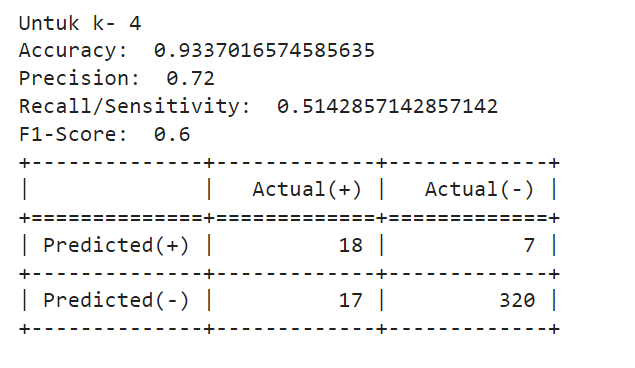

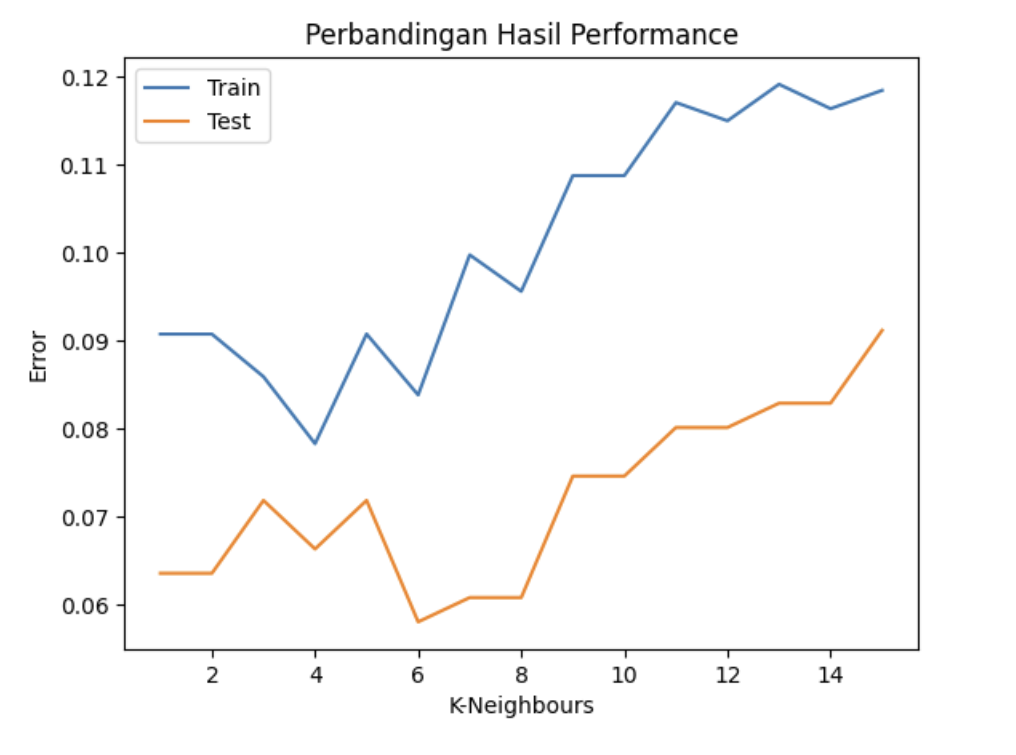

Tetapi running time kNN cukup lama tergantung data yang di test. Karena metode ini memiliki kompleksitas O(n), dimana dia linear dengan data yang diinputkan.

#### Kesimpulan
Dapat disimpulkan bahwa model training menggunakan metode kNN pada data Auction Verification menghasilkan model learning yang baik jika digunakan k tetangga sebanyak 4 dan dapat digunakan untuk memprediksi data baru yang tidak ada di data sebelumnya.